In [104]:
%matplotlib inline
#compare all flacco values from bbob and the 3 problems
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

bbob = np.load("all_flacco_bbob.npy")
mnist = np.load("mnist_flacco.npy")
cifar = np.load("cifar_flacco.npy")
fashion = np.load("fashion_flacco.npy")

mnist2 = np.load("mnist_flacco_zoomed.npy")
cifar2 = np.load("cifar10_flacco_zoomed.npy")
fashion2 = np.load("fashion_flacco_zoomed.npy")

all_data = np.concatenate((mnist.reshape(1,-1), cifar.reshape(1,-1), fashion.reshape(1,-1), 
                           mnist2.reshape(1,-1), cifar2.reshape(1,-1), fashion2.reshape(1,-1), bbob))

import pandas as pd
df = pd.DataFrame(all_data)
all_data = df.dropna(axis=1).values

sample = all_data[:,1:]
bbob_sample = sample[6:,1:]
bbob_target = sample[6:,0].astype("int32") 
colors = all_data[:,0].astype("int32") 
colors[0] = 0
colors[1] = 0
colors[2] = 0

colors[3] = 0
colors[4] = 0
colors[5] = 0
color_names = get_cmap(28)
labels = ["NN"]
for i in range(1,25):
    labels.append("f"+str(i))



sample.shape

(486, 102)

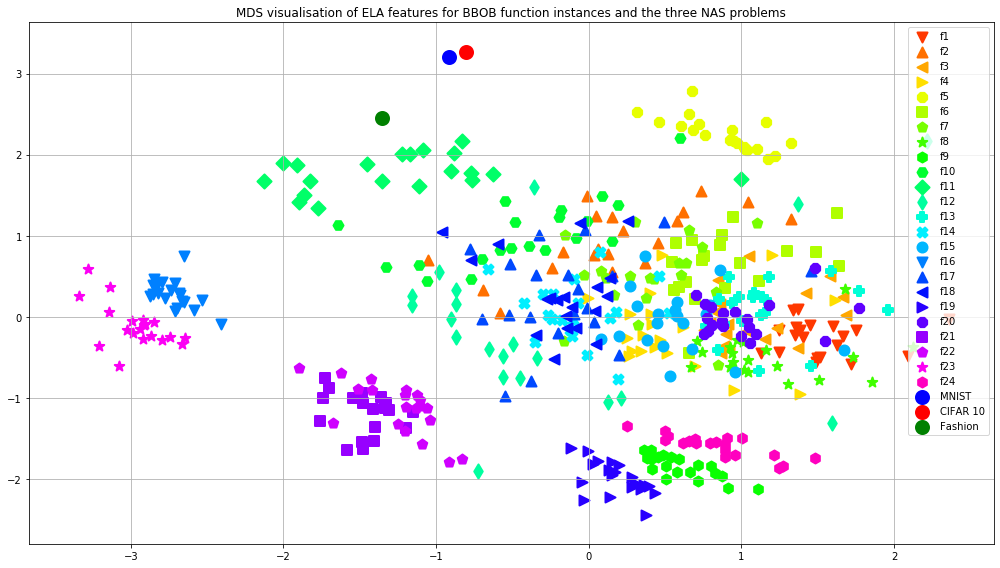

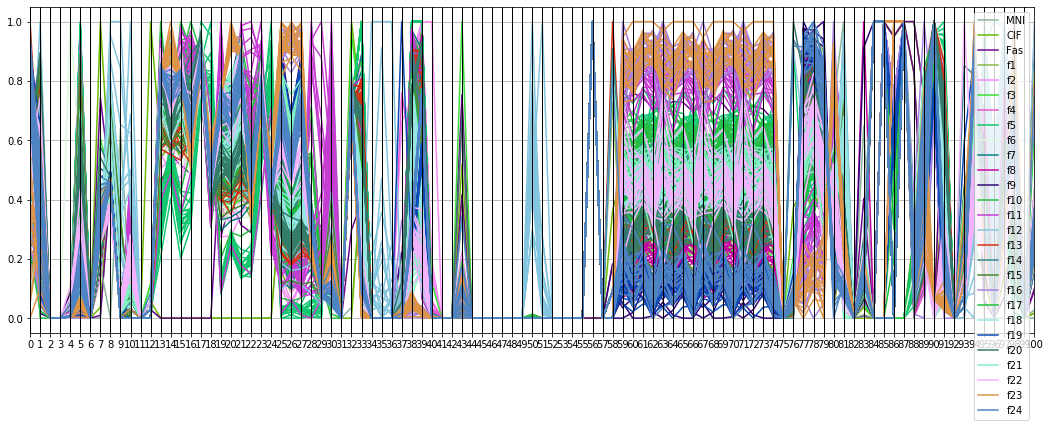

In [113]:
from sklearn import preprocessing

from matplotlib.lines import Line2D


x = sample
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

similarities = euclidean_distances(x_scaled)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=42,
               dissimilarity="precomputed", n_jobs=5)

pos = mds.fit(similarities).embedding_

# Rescale the data
#pos *= np.sqrt((x_scaled ** 2).sum()) / np.sqrt((pos ** 2).sum())
# Rotate the data
#clf = PCA(n_components=2)
#pos = clf.fit_transform(pos)
#rotation matrix
#t = np.array([[1,0.5],[-1,0.5]])
#pos = np.dot(pos, t)

#if (dataset=="cifar10"):
#    obj_values = np.array(obj_values) * 2



fig = plt.figure(figsize=[14,8])

plt.title("MDS visualisation of ELA features for BBOB function instances and the three NAS problems")
s = 100
import copy
templabels = copy.deepcopy(labels)
for i in range(len(pos)):
    l = copy.deepcopy(templabels[colors[i]])
    if (l != "NN"):
        plt.scatter(pos[i, 0], pos[i, 1], color=color_names(colors[i]), s=s, lw=2, marker=Line2D.filled_markers[colors[i] % len(Line2D.filled_markers)], label=l)
        templabels[colors[i]] = "_nolegend_"
plt.scatter(pos[0, 0], pos[0, 1], color="blue", s=100, lw=5, label='MNIST')
plt.scatter(pos[1, 0], pos[1, 1], color="red", s=100, lw=5, label='CIFAR 10')
plt.scatter(pos[2, 0], pos[2, 1], color="green", s=100, lw=5, label='Fashion')

#plt.scatter(pos[3, 0], pos[3, 1], color="blue", s=100, marker="*", lw=5, label='MNIST*')
#plt.scatter(pos[4, 0], pos[4, 1], color="red", s=100, marker="*", lw=5, label='CIFAR 10*')
#plt.scatter(pos[5, 0], pos[5, 1], color="green", s=100, marker="*", lw=5, label='Fashion*')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("ela_features_bbob.pdf")
plt.show()

df = pd.DataFrame(x_scaled[:,1:])
new_labels = np.array(labels)[colors]
new_labels[0] = "MNIST"
new_labels[1] = "CIFAR 10"
new_labels[2] = "Fashion"
new_labels[3] = "MNIST"
new_labels[4] = "CIFAR 10"
new_labels[5] = "Fashion"
df["class"] = new_labels

plt.figure(figsize=[18,6])
pd.plotting.parallel_coordinates(
    df, 'class'
)
plt.show()

In [124]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(x_scaled[6:,1:], bbob_target)
print(x_scaled[6:,1:].shape)
print(x_scaled[:,1:].shape)
print(clf.predict(x_scaled[0,1:].reshape(1, -1)))
print(clf.predict(x_scaled[1,1:].reshape(1, -1)))
print(clf.predict(x_scaled[2,1:].reshape(1, -1)))
print(clf.predict(x_scaled[3,1:].reshape(1, -1)))
print(clf.predict(x_scaled[4,1:].reshape(1, -1)))
print(clf.predict(x_scaled[5,1:].reshape(1, -1)))

for i in range(3):
    print("Analysing ",i)

    dist, kn = clf.kneighbors(x_scaled[i,1:].reshape(1, -1), 20, True)
    print(np.mean(dist), "+/-", np.std(dist))
    means = []
    for k in kn[0]:
        dist, _ = clf.kneighbors(x_scaled[k,1:].reshape(1, -1), 20, True)
        means.append(np.mean(dist))
    print( "means", np.mean(means), "+/-", np.std(means))

(480, 101)
(486, 101)
[13]
[12]
[12]
[12]
[13]
[12]
Analysing  0
3.242703788898953 +/- 0.030420712613719324
means 0.7096266740332611 +/- 0.1753935629964772
Analysing  1
3.2420899333777626 +/- 0.03918685927185061
means 0.7151172491333602 +/- 0.18003630928421327
Analysing  2
2.7103819289687547 +/- 0.038158510171900153
means 0.7161886689350918 +/- 0.20450006241410468
